<h1 style = 'text-align: center'><b>Practice 04: Factor Analysis</b></h1>

- Full name: Võ Nguyễn Hoàng Kim
- Student ID: 21127090

In [79]:
# import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

<h2><b>1. Preprocess data</b></h2>

In [80]:
# process data

df = pd.read_csv('bfi.csv')

df.columns

# droping unnecessary columns
df.drop(['gender', 'education', 'age'], axis = 1, inplace = True)

# droping missing values rows
df.dropna(inplace=True)
df.columns

Index(['rownames', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2',
       'O3', 'O4', 'O5'],
      dtype='object')

<h3><b>1.1. Plot data with correlation matrix</b></h3>

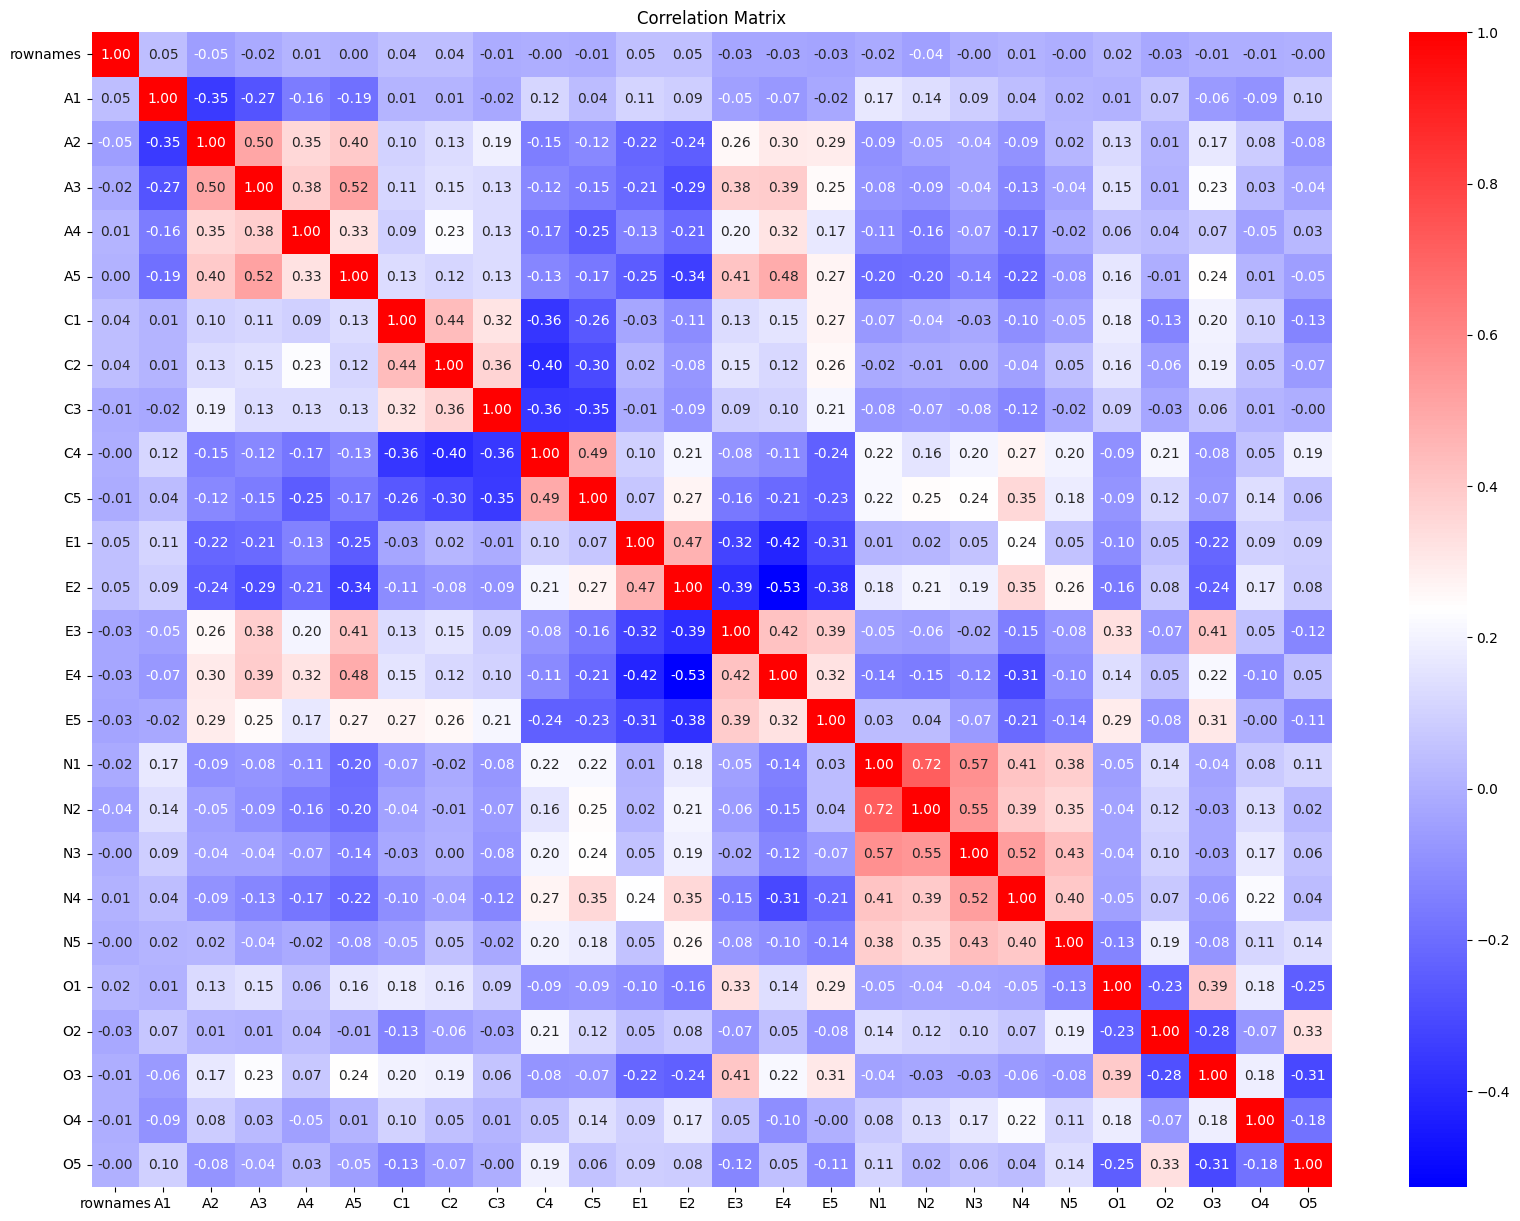

In [81]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h2><b>2. Bartlett's test and KMO</b></h2>

In [82]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value=calculate_bartlett_sphericity(df)
print("(chi_square_values, p_value): ({}, {})".format(chi_square_value, p_value))


(chi_square_values, p_value): (18184.306307820785, 0.0)


In [83]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
print("KMO: ",kmo_model)

KMO:  0.8483267027192372


<h2><b>3. Choose best number of factors</b></h2>

[5.13457985 2.75337527 2.14814212 1.85250623 1.54846254 1.11066151
 0.98067695 0.82430872 0.79516217 0.71828982 0.68602566 0.67614851
 0.65177562 0.62297416 0.59623084 0.56244599 0.54329886 0.51434031
 0.49437154 0.48263949 0.44865495 0.42280589 0.40028481 0.38773757
 0.38183723 0.2622634 ]
6


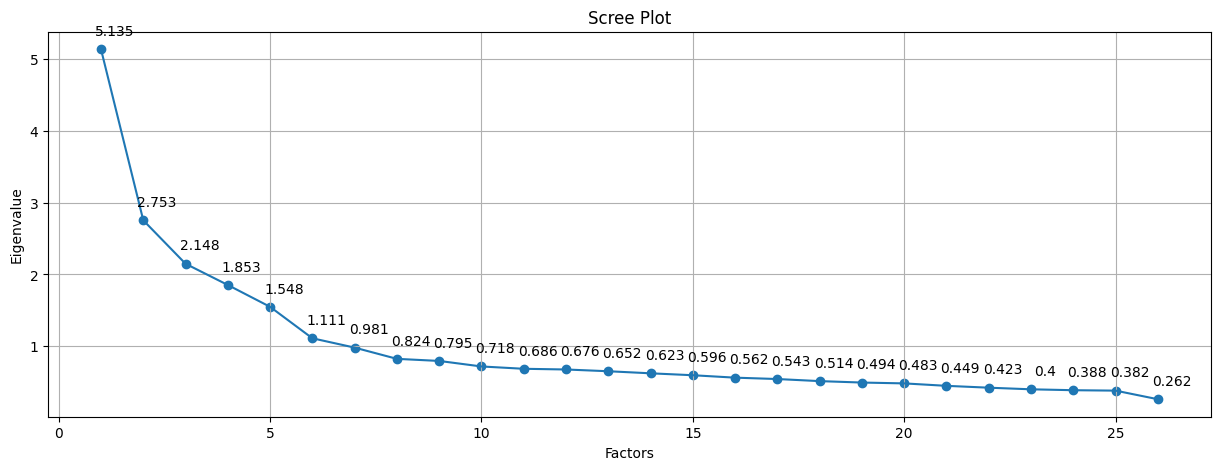

In [84]:
# create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors = 25, rotation = None)
fa.fit(df)

# Check the eigenvalues
eigenValues, v = fa.get_eigenvalues()
print(eigenValues)

# choose the best number of factors
numberFactors = 0;
for i in eigenValues:
    if(i>1):
        numberFactors+=1
print(numberFactors)

# scree plot using matplotlib
plt.figure(figsize=(15, 5))
plt.scatter(range(1,df.shape[1]+1), eigenValues)
plt.plot(range(1,df.shape[1]+1), eigenValues)
for i, (x, y) in enumerate(zip(range(1, df.shape[1] + 1), eigenValues)):
    plt.annotate(np.round(eigenValues[i], 3), (x, y), textcoords="offset points", xytext=(10,10), ha='center')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<h2><b>4. Factor loadings</b></h2>

In [108]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors = 6, rotation = "varimax")
fa.fit(df)
factor_loading = fa.loadings_

# make loading table 
loadings = pd.DataFrame(factor_loading)
loadings.columns = ["Factor {}".format(i+1) for i in range(6)]

# set high loadings value
high_loadings = 0.3 

for i in range(1, 7):
    factor = "Factor "+ str(i)
    column_values = loadings[factor]
    if(max(column_values) > high_loadings):
        print(factor)
loadings

Factor 1
Factor 2
Factor 3
Factor 4
Factor 5
Factor 6


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
0,-0.022903,-0.032472,0.033169,-0.038093,0.003795,0.103748
1,0.099396,0.060474,0.026694,-0.530785,-0.120309,0.163638
2,0.031767,0.259875,0.140226,0.646569,0.055770,-0.097050
3,-0.005256,0.408849,0.109534,0.587004,0.016184,0.039149
4,-0.079266,0.255342,0.229308,0.391760,-0.136293,0.033401
5,-0.143645,0.491049,0.085649,0.451090,0.009111,0.105888
6,0.005623,0.123647,0.540150,0.004221,0.183458,0.138798
7,0.084358,0.106505,0.652496,0.056538,0.079203,0.208580
8,-0.033946,0.049796,0.545877,0.100286,-0.012372,0.054480
9,0.231617,0.008989,-0.672785,-0.089980,-0.153451,0.226977


<h2><b>5. Factor variance  </b></h2>

In [114]:
factor_variance, proportion_variance, cumulative_variance = fa.get_factor_variance()
print("Factor variance:\n", factor_variance)
factor_variance_df = pd.DataFrame({'Factor Variance': factor_variance, 
                                   'Proportion Variance': proportion_variance,
                                   'Cumulative Variance': cumulative_variance,
                                   })
factor_variance_df

Factor variance:
 [2.76721162 2.72814016 2.07554606 1.61083619 1.46335442 0.62155903]


,Factor Variance,Proportion Variance,Cumulative Variance
0,2.767212,0.106431,0.106431
1,2.728140,0.104928,0.211360
2,2.075546,0.079829,0.291188
3,1.610836,0.061955,0.353144
4,1.463354,0.056283,0.409426
5,0.621559,0.023906,0.433333
